# Simple example

The example below shows how to create a custom eye model from clinical parameters, build it in OpticStudio, and interact with the model.

## Import `visisipy` and other dependencies

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import visisipy

In [2]:
# Use the open-source Optiland backend for calculations; to use OpticStudio, replace
# "optiland" with "opticstudio"
visisipy.set_backend("optiland")

In [3]:
import warnings

warnings.filterwarnings("ignore", message="Header and row length mismatch")

visisipy.set_backend("optiland")

D:\code\zemax\visisipy\visisipy\backend.py:293: UserWarning: The backend is already set to OptilandBackend. Reconfiguring the backend is not recommended and may cause issues.
  warn(


## Define and build the eye model

Yes, it's only two lines of code!

In [4]:
# Initialize the default Navarro model
model = visisipy.EyeModel()

# Build the model in OpticStudio
model.build()

## Perform a raytrace analysis

In [5]:
# List of (x, y) coordinates
coordinates = [(0, 0), (0, 10), (0, 20), (0, 30), (0, 40)]
raytrace = visisipy.analysis.raytrace(coordinates=coordinates)

# Alternatively, the model can be built and analyzed in one go:
# raytrace = visisipy.analysis.raytrace(model, coordinates=zip([0] * 5, range(0, 60, 10)))

## Visualize the eye model and the raytrace results

In [6]:
raytrace.z -= model.geometry.cornea_thickness + model.geometry.anterior_chamber_depth

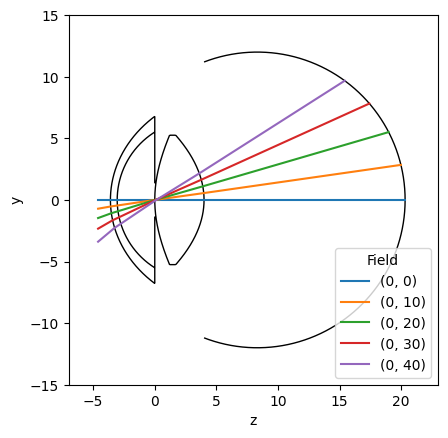

In [7]:
fig, ax = plt.subplots()
visisipy.plots.plot_eye(ax, model.geometry, lens_edge_thickness=0.5)
ax.set_xlim((-7, 23))
ax.set_ylim((-15, 15))
ax.set_aspect("equal")

sns.lineplot(raytrace, x="z", y="y", hue="field", ax=ax)
sns.move_legend(ax, loc="lower right", title="Field")